In [195]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision
import os


transform = transforms.Compose([#transforms.Resize((256,256)),  
                                transforms.Grayscale(),		# the code transforms.Graysclae() is for changing the size [3,100,100] to [1, 100, 100] (notice : [channel, height, width] )
                                transforms.ToTensor(),])


#train_data_path = 'relative path of training data set'
train_data_path = 'horse-or-human/horse-or-human/train'
trainset = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
# if shuffle=True, the data reshuffled at every epoch #numworks가 뭐지?
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1027, shuffle=False, num_workers=0)  


validation_data_path = 'horse-or-human/horse-or-human/validation'
valset = torchvision.datasets.ImageFolder(root=validation_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
valloader = torch.utils.data.DataLoader(valset, batch_size=256, shuffle=False, num_workers=0)  

NUM_EPOCH=1
for epoch in range(NUM_EPOCH):
    # load training images of the batch size for every iteration
    for i, data in enumerate(trainloader):

        # inputs is the image
        # labels is the class of the image
        inputs, labels = data

        # if you don't change the image size, it will be [batch_size, 1, 100, 100]
        print(inputs.shape)

        # if labels is horse it returns tensor[0,0,0] else it returns tensor[1,1,1]
        print(labels)  





    # load validation images of the batch size for every iteration
    for i, data in enumerate(valloader):
        
        # inputs is the image
        # labels is the class of the image
        inputs, labels = data

        # if you don't change the image size, it will be [batch_size, 1, 100, 100]
        print(inputs.shape)

        # if labels is horse it returns tensor[0,0,0] else it returns tensor[1,1,1]
        print(labels)    

torch.Size([1027, 1, 100, 100])
tensor([0, 0, 0,  ..., 1, 1, 1])
torch.Size([256, 1, 100, 100])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [215]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd

In [197]:
train_dataset = next(iter(trainloader))[0].numpy()
train_label =next(iter(trainloader))[1].numpy()

val_dataset = next(iter(valloader))[0].numpy()
val_label =next(iter(valloader))[1].numpy()

In [198]:
train_dataset.shape
train_label.shape
train_label=train_label.reshape(1027,1)
print(train_dataset.shape)


val_label=val_label.reshape(256,1)

(1027, 1, 100, 100)


In [199]:
train_flatten=train_dataset.reshape(1027,train_dataset.shape[2]*train_dataset.shape[3])
print(train_flatten.shape)
val_flatten=val_dataset.reshape(256,val_dataset.shape[2]*val_dataset.shape[3])

(1027, 10000)


In [200]:
x_train=train_flatten.T
y_train=train_label.T
print(x_train.shape)
print(y_train.shape)

x_test=val_flatten.T
y_test=val_label.T
print(x_test.shape)
print(y_test.shape)


(10000, 1027)
(1, 1027)
(10000, 256)
(1, 256)


In [230]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train,y_train):
    delta=1e-7
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head+delta)-(1-y_train)*np.log((1-y_head)+delta)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def loss_fnc(w,b,x_test,y_test):
    delta=1e-7
    z = np.dot(w.T,x_test) + b
    y_head = sigmoid(z)
    loss = -y_test*np.log(y_head+delta)-(1-y_test)*np.log((1-y_head)+delta)
    cost = (np.sum(loss))/x_test.shape[1]
    return cost

def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    val_list = []
    
    
    for i in range(number_of_iterarion):
        
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            val_list.append(loss_fnc(w,b,x_test,y_test))
           # print ("Cost after iteration %i: %f" %(i, cost))
            print("Iteration %i\t Training Loss : %f\t Validation Loss %f"%(i,cost,loss_fnc(w,b,x_test,y_test)))
            parameters = {"weight": w,"bias": b}
            y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
            y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
            print("\t\t Train Accuracy: {} \t\t Test Accuracy: {} ".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2),round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Loss of Training Set")
    plt.show()
    
    plt.plot(index,val_list)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Loss of Validation Set")
    plt.show()
    return parameters, gradients, cost_list, val_list

def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):

    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list, val_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Final Results :")
    #print("\tTrain Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))
    #print("\tTrain Loss: %.4f " %(cost_list[-1]))
    #print("\tValidation Accuracy: {}%".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    #print("\tValidation Loss: %.4f"%(val_list[-1]))
    
    
    
    import plotly.graph_objects as go

    headerColor = 'grey'
    rowEvenColor = 'lightgrey'
    rowOddColor = 'white'

    fig = go.Figure(data=[go.Table(
    header=dict(
    values=['<b>dataset</b>','<b>loss</b>','<b>accuracy</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)),
    cells=dict(
    values=[
      ['training', 'validation'],
      ["{0:.6f}".format(cost_list[-1]), "{0:.6f}".format(val_list[-1])],
      [(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)), (round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2))]],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))])

    fig.show()

Iteration 0	 Training Loss : 7.845892	 Validation Loss 8.059048
		 Train Accuracy: 51.31 		 Test Accuracy: 50.0 %
-Test Accuracy: 50.0 %


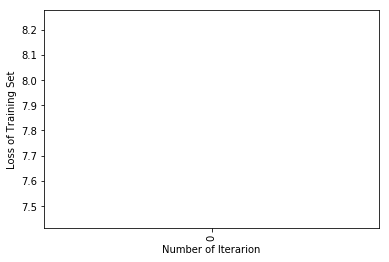

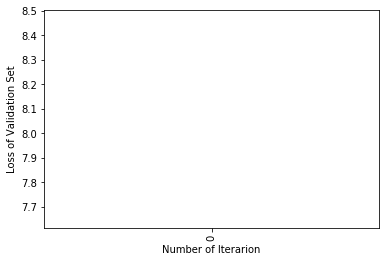

Final Results :


In [231]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 100)

Label: 0


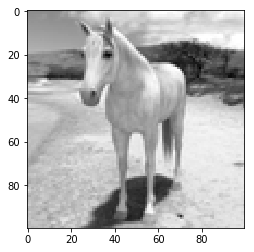

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline
image,label = trainset[0]
#print(image)
plt.imshow(image[0],cmap='gray')
print('Label:',label)

In [150]:
print(len(trainset))
print(len(valset))

1027
256


In [164]:
import torch.nn as nn

input_size=1*100*100
num_classes=2

model=nn.Linear(input_size,num_classes)

In [165]:
class HorseOrHuman(nn.Module) :
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(input_size,num_classes)
    def forward(self,xb):
        xb=xb.reshape(-1,10000)
        out=self.linear(xb)
        return out
model=HorseOrHuman()

In [166]:
for images,labels in trainloader:
    outputs=model(images)
    break
print('outputs.shape : ',outputs.shape)
print('Sample outputs : \n', outputs[:2].data)

outputs.shape :  torch.Size([3, 2])
Sample outputs : 
 tensor([[-0.2473, -0.1074],
        [-0.4437, -0.3392]])


In [167]:
import torch.nn.functional as F

probs=F.softmax(outputs,dim=1)
print("sample probabilities\n",probs[:2].data)
print("Sum",torch.sum(probs[0]))

sample probabilities
 tensor([[0.4651, 0.5349],
        [0.4739, 0.5261]])
Sum tensor(1., grad_fn=<SumBackward0>)


In [168]:
max_probs,preds=torch.max(probs,dim=1)
print(preds)
labels

tensor([1, 1, 1])


tensor([0, 0, 0])

In [169]:
def accuracy(ouputs,labels):
    _,preds=torch.max(outputs,dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [170]:
accuracy(preds,labels)

0.0

In [171]:
#loss function
loss_fn=F.cross_entropy

In [172]:
loss=loss_fn(outputs,labels)
print(loss)

tensor(0.7408, grad_fn=<NllLossBackward>)


In [58]:
#loss_fn=F.binary_cross_entropy_with_logits
def sigmoid(x):
    return 1/(1+np.exp(-x))

def loss_fn(x,t) :
    delta=1e-2
    z=np.dot(x,W)+b
    y=sigmoid(z)
    
    return -np.sum(t*np.log(y+delta)+(1-t)*np.log((1-y)*delta))
    
loss=loss_fn(outputs,labels)

ValueError: Target size (torch.Size([3])) must be the same as input size (torch.Size([3, 2]))

In [173]:
#optimizer
learning_rate=0.000001
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [174]:
def loss_batch(model,loss_func,xb,yb,opt=None):
    preds=model(xb)
    loss=loss_func(preds,yb)
    
    if opt is not None:
        #Compute gradients
        loss.backward()
        #Update parameters
        opt.step()
        #Reset gradients
        opt.zero_grad()
        
    metric_result=None
    metric_result=accuracy(preds,yb) #?웨얼
        
    return loss.item(), len(xb), metric_result

In [175]:
def evaluate(model, loss_fn, valid_dl ):
    with torch.no_grad():
        results = [loss_batch(model,loss_fn,xb,yb)for xb,yb in valid_dl]
        
        losses, nums, metrics = zip(*results)
        #total size of dataset
        total = np.sum(nums)
        #avg. loss across batches
        total_loss=np.sum(np.multiply(losses,nums))
        avg_loss=total_loss/total
        avg_metric=None
        
        tot_metric=np.sum(np.multiply(metrics, nums))
        avg_metric=tot_metric/total
    return avg_loss, total, avg_metric


In [176]:
import numpy as np

In [177]:
#해보는것
val_loss,total,val_acc=evaluate(model,loss_fn,valloader)
print('Loss: {:.4f},Accuracy:{:.4f}'.format(val_loss,val_acc))

Loss: 0.6881,Accuracy:0.5000


In [183]:
losses = []
accuracies = []
def fit(epochs,model,loss_fn,opt,train_dl,valid_dl):
    for epoch in range(epochs):
        # Training
        for xb, yb in train_dl :
            loss,_,_=loss_batch(model,loss_fn,xb,yb,opt)
        #Evaluate
        result=evaluate(model,loss_fn,valid_dl)
        val_loss,total, val_metric=result
        
        #print progress
        print('Epoch [{}/{}], Loss:{:.4f}, Accuracy : {:.4f}'.format(epoch+1,epochs,val_loss,val_metric))
        
        global losses, accuracies
        losses+=[val_loss]
        accuracies+=[val_metric]
            

In [179]:
model=HorseOrHuman()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [184]:
fit(10,model,F.cross_entropy,optimizer,trainloader,valloader)

Epoch [1/10], Loss:0.6870, Accuracy : 0.5000
Epoch [2/10], Loss:0.6932, Accuracy : 0.5000
Epoch [3/10], Loss:0.6962, Accuracy : 0.5000
Epoch [4/10], Loss:0.6970, Accuracy : 0.5000
Epoch [5/10], Loss:0.6964, Accuracy : 0.5000
Epoch [6/10], Loss:0.6949, Accuracy : 0.5000
Epoch [7/10], Loss:0.6929, Accuracy : 0.5000
Epoch [8/10], Loss:0.6905, Accuracy : 0.5000
Epoch [9/10], Loss:0.6880, Accuracy : 0.5000
Epoch [10/10], Loss:0.6854, Accuracy : 0.5000


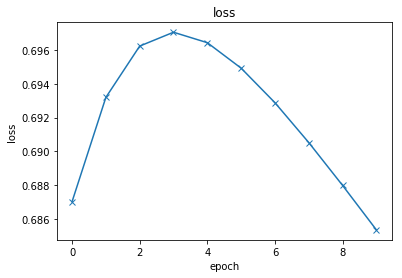

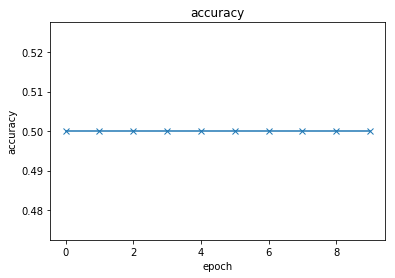

In [185]:
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss')
plt.show()

plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy')
plt.show()